In [1]:
import numpy as np
import pandas as pd 
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Lung problem.csv.txt')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [5]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


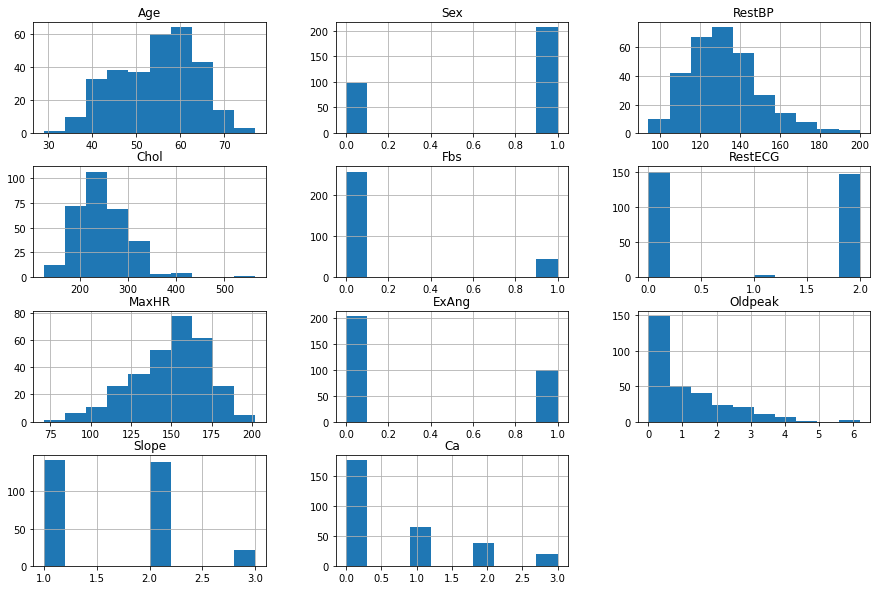

In [6]:
df.hist(figsize=(15,10))
plt.show()

In [7]:
df['AHD']=df.AHD.replace({"N0":"0","Yes":"1"})
df['ChestPain']=df.ChestPain.replace({"typical":1,"asymptomatic":2,"nonanginal":3,"nontypical":4})
df['Thal']=df.Thal.replace({"fixed":1,"normal":2,"reversable":3})
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,1.0,No
2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,2.0,1
3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,2.0,No
5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,2.0,No


In [8]:
df['AHD'].value_counts()#0-->no heart disease.1-->has heart disease

No    164
1     139
Name: AHD, dtype: int64

In [9]:
df[['Age','Sex','ChestPain','RestECG','Slope','Oldpeak','Ca','ExAng','Chol','Thal']].corr()

,Age,Sex,ChestPain,RestECG,Slope,Oldpeak,Ca,ExAng,Chol,Thal
Age,1.000000,-0.097542,-0.173124,0.148868,0.161770,0.203805,0.362605,0.091661,0.208950,0.061823
Sex,-0.097542,1.000000,-0.122660,0.021647,0.037533,0.102173,0.093185,0.146201,-0.199915,0.214748
ChestPain,-0.173124,-0.122660,1.000000,-0.157005,-0.250500,-0.334661,-0.187667,-0.314993,-0.015387,-0.168103
RestECG,0.148868,0.021647,-0.157005,1.000000,0.133946,0.114133,0.128343,0.084867,0.171043,-0.011543
Slope,0.161770,0.037533,-0.250500,0.133946,1.000000,0.577537,0.110119,0.257748,-0.004062,0.106051
Oldpeak,0.203805,0.102173,-0.334661,0.114133,0.577537,1.000000,0.295832,0.288223,0.046564,0.208998
Ca,0.362605,0.093185,-0.187667,0.128343,0.110119,0.295832,1.000000,0.145570,0.119000,0.149768
ExAng,0.091661,0.146201,-0.314993,0.084867,0.257748,0.288223,0.145570,1.000000,0.061310,0.228084
Chol,0.208950,-0.199915,-0.015387,0.171043,-0.004062,0.046564,0.119000,0.061310,1.000000,0.080874
Thal,0.061823,0.214748,-0.168103,-0.011543,0.106051,0.208998,0.149768,0.228084,0.080874,1.000000


In [10]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [11]:
#filling of null values
df.fillna(0,inplace=True)
df['Thal'].fillna("Unknown",inplace=True)
df['Ca'].fillna("Unknown",inplace=True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,1.0,No
2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,2.0,1
3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,2.0,No
5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,2.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3.0,1
300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,3.0,1
301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,3.0,1
302,57,0,4,130,236,0,2,174,0,0.0,2,1.0,2.0,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
#seperating dependent and independent data
x=df.drop(columns='AHD',axis=1)
y=df['AHD']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12529,stratify=y,test_size=0.2)

In [15]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [16]:
LogReg=LogisticRegression()

In [17]:
LogReg.fit(x_train, y_train)

C:\Users\Ankith K C\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
LogReg.predict(x_train)

array(['No', '1', '1', 'No', 'No', '1', '1', 'No', '1', 'No', '1', 'No',
       'No', 'No', 'No', '1', '1', '1', 'No', 'No', '1', 'No', 'No', 'No',
       'No', 'No', '1', '1', '1', 'No', '1', '1', 'No', 'No', 'No', '1',
       'No', 'No', '1', 'No', '1', 'No', 'No', 'No', '1', 'No', 'No',
       'No', '1', 'No', 'No', 'No', '1', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', '1', 'No', '1', '1', '1', 'No', '1', '1', 'No', 'No',
       'No', '1', 'No', 'No', 'No', '1', '1', '1', '1', 'No', 'No', '1',
       'No', 'No', 'No', '1', 'No', 'No', '1', '1', '1', 'No', 'No', 'No',
       '1', '1', '1', '1', 'No', 'No', '1', 'No', 'No', '1', 'No', 'No',
       '1', '1', '1', 'No', 'No', '1', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', '1', '1', '1', 'No', 'No', '1', 'No', 'No', '1', '1',
       '1', 'No', '1', '1', 'No', 'No', '1', '1', 'No', '1', 'No', '1',
       'No', 'No', '1', 'No', '1', 'No', '1', '1', '1', 'No', '1', '1',
       '1', 'No', 'No', '1', 'No', 'No', '1', 'No', 

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
x_trainpred=LogReg.predict(x_train)
train_data_accuracy=accuracy_score(x_trainpred,y_train)

In [21]:
print(train_data_accuracy)

0.8305785123966942


In [22]:
x_testpred=LogReg.predict(x_test)
test_data_accuracy=accuracy_score(x_testpred,y_test)

In [23]:
print(test_data_accuracy)

0.8524590163934426


In [24]:
#checking the heart heart+_disease

typical=1
asymptomatic=2
nonanginal=3
nontypical=4
fixed=1
normal=2
reversable=3

specific_data=(61,1,nonanginal,150,243,1,0,137,1,1,2,0,normal)

np_array=np.asarray(specific_data)

reshaped_data=np_array.reshape(1,-1)

prediction=LogReg.predict(reshaped_data)

print(prediction)

['1']
